# 使用机器学习选择标签
[apoc](https://github.com/haesleinhuepf/apoc) 允许根据大小、形状和相应图像中的强度等属性来选择标记的对象。在这个例子中，我们将从斑点的实例分割中选择细长的对象。

In [1]:
import apoc

from skimage.io import imread
import pyclesperanto_prototype as cle
import numpy as np

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
image = imread('../../data/blobs.tif')
labels = cle.label(cle.threshold_otsu(image))
annotation = imread('../../data/label_annotation.tif')

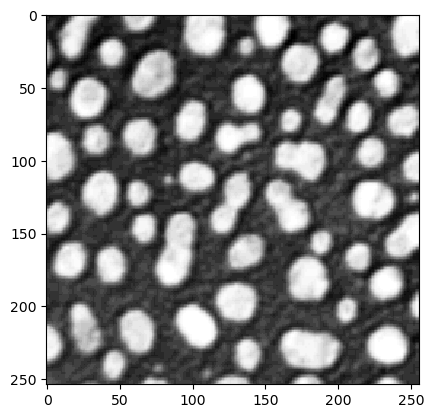

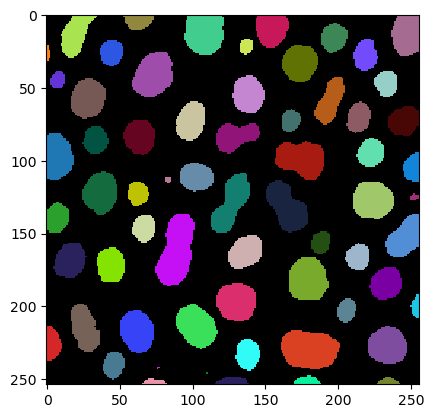

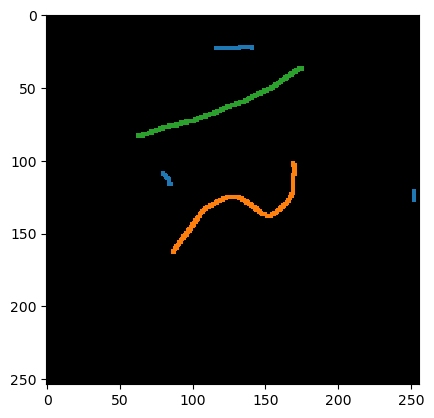

In [3]:
cle.imshow(image)
cle.imshow(labels, labels=True)
cle.imshow(annotation, labels=True)

## 训练
为了训练分类器，你需要指定特征。在下面，我们使用标记对象内的平均和标准差强度以及对象的大小和形状。

In [4]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

cl_filename = "object_selector.cl"

# Create an object classifier
apoc.erase_classifier(cl_filename) # delete it if it was existing before
classifier = apoc.ObjectSelector(cl_filename, positive_class_identifier=1)

# train it
classifier.train(features, labels, annotation, image)

## 预测
在分类器训练完成后，我们可以使用它来选择对象。

23.0


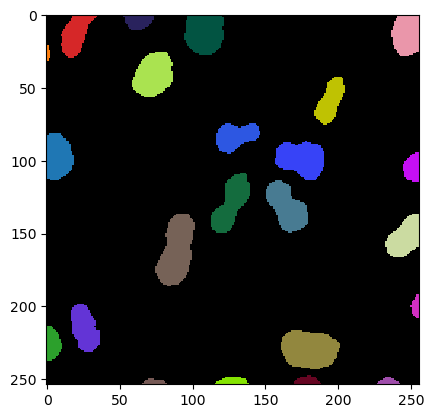

In [5]:
result = classifier.predict(labels, image)

print(result.max())

cle.imshow(result, labels=True)

也可以从磁盘加载分类器并将其应用于另一个数据集。我们通过将分类器应用于上面图像和标签图像的旋转版本来演示这一点。

23.0


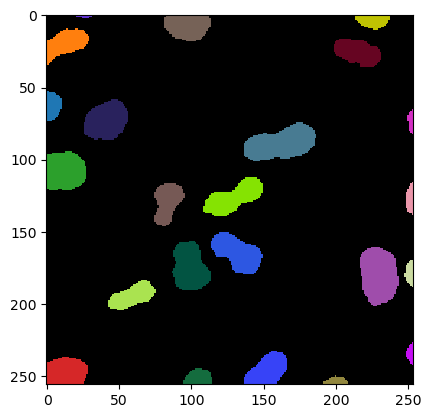

In [6]:
image1 = image.T
labels1 = cle.label(cle.threshold_otsu(image1))

classifier = apoc.ObjectSelector(cl_filename)

result = classifier.predict(labels1, image1)

print(result.max())

cle.imshow(result, labels=True)

训练后，我们可以询问分类器在进行预测时各个特征的重要性如何。

In [7]:
classifier.feature_importances()

{'area': 0.29573084473661354,
 'mean_max_distance_to_centroid_ratio': 0.4264564597125618,
 'standard_deviation_intensity': 0.27781269555082466}

# 练习
使用上面的代码和示例图像来训练一个分类器，该分类器可以选择标签图像中的所有小对象。